# Filtering Signals
In this tutorial we will practice filtering MIMIC waveform signals.

Our **objectives** are to:
- Filter signals using the [SciPy signal processing package](https://docs.scipy.org/doc/scipy/reference/signal.html).
- Understand how to interpret the amplitude-response of a filter.
- Gain experience in filtering PPG signals.
- Be able to use filters to obtain the derivatives of a signal

<div class="alert alert-block alert-warning"><p><b>Context:</b> Filtering is used to eliminate noise from physiological signals. For instance, ECG signals can contain mains frequency noise due to electrical interference. Ideally, a filter would attenuate unwanted frequency content in a signal whilst retaining the physiological frequency content.</p></div>

<div class="alert alert-block alert-info"><p><b>Extension:</b> If you've not seen it before, then have a look at the <a href= https://docs.scipy.org/doc/scipy/reference/signal.html>SciPy signal processing package</a>. How might it be helpful for processing PPG signals?</p></div>

## Setup

_The following steps have been covered in previous tutorials. We'll just re-use the previous code here._

In [53]:
# Packages
import sys
from pathlib import Path
!pip install wfdb==4.0.0
import wfdb

In [54]:
# The name of the MIMIC IV Waveform Database on Physionet
database_name = 'mimic4wdb/0.1.0'

# Segment for analysis
segment_names = ['83404654_0005', '82924339_0007', '84248019_0005', '82439920_0004', '82800131_0002', '84304393_0001', '89464742_0001', '88958796_0004', '88995377_0001', '85230771_0004', '86643930_0004', '81250824_0005', '87706224_0003', '83058614_0005', '82803505_0017', '88574629_0001', '87867111_0012', '84560969_0001', '87562386_0001', '88685937_0001', '86120311_0001', '89866183_0014', '89068160_0002', '86380383_0001', '85078610_0008', '87702634_0007', '84686667_0002', '84802706_0002', '81811182_0004', '84421559_0005', '88221516_0007', '80057524_0005', '84209926_0018', '83959636_0010', '89989722_0016', '89225487_0007', '84391267_0001', '80889556_0002', '85250558_0011', '84567505_0005', '85814172_0007', '88884866_0005', '80497954_0012', '80666640_0014', '84939605_0004', '82141753_0018', '86874920_0014', '84505262_0010', '86288257_0001', '89699401_0001', '88537698_0013', '83958172_0001']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339', 'mimic4wdb/0.1.0/waves/p102/p10209410/84248019', 'mimic4wdb/0.1.0/waves/p109/p10952189/82439920', 'mimic4wdb/0.1.0/waves/p111/p11109975/82800131', 'mimic4wdb/0.1.0/waves/p113/p11392990/84304393', 'mimic4wdb/0.1.0/waves/p121/p12168037/89464742', 'mimic4wdb/0.1.0/waves/p121/p12173569/88958796', 'mimic4wdb/0.1.0/waves/p121/p12188288/88995377', 'mimic4wdb/0.1.0/waves/p128/p12872596/85230771', 'mimic4wdb/0.1.0/waves/p129/p12933208/86643930', 'mimic4wdb/0.1.0/waves/p130/p13016481/81250824', 'mimic4wdb/0.1.0/waves/p132/p13240081/87706224', 'mimic4wdb/0.1.0/waves/p136/p13624686/83058614', 'mimic4wdb/0.1.0/waves/p137/p13791821/82803505', 'mimic4wdb/0.1.0/waves/p141/p14191565/88574629', 'mimic4wdb/0.1.0/waves/p142/p14285792/87867111', 'mimic4wdb/0.1.0/waves/p143/p14356077/84560969', 'mimic4wdb/0.1.0/waves/p143/p14363499/87562386', 'mimic4wdb/0.1.0/waves/p146/p14695840/88685937', 'mimic4wdb/0.1.0/waves/p149/p14931547/86120311', 'mimic4wdb/0.1.0/waves/p151/p15174162/89866183', 'mimic4wdb/0.1.0/waves/p153/p15312343/89068160', 'mimic4wdb/0.1.0/waves/p153/p15342703/86380383', 'mimic4wdb/0.1.0/waves/p155/p15552902/85078610', 'mimic4wdb/0.1.0/waves/p156/p15649186/87702634', 'mimic4wdb/0.1.0/waves/p158/p15857793/84686667', 'mimic4wdb/0.1.0/waves/p158/p15865327/84802706', 'mimic4wdb/0.1.0/waves/p158/p15896656/81811182', 'mimic4wdb/0.1.0/waves/p159/p15920699/84421559', 'mimic4wdb/0.1.0/waves/p160/p16034243/88221516', 'mimic4wdb/0.1.0/waves/p165/p16566444/80057524', 'mimic4wdb/0.1.0/waves/p166/p16644640/84209926', 'mimic4wdb/0.1.0/waves/p167/p16709726/83959636', 'mimic4wdb/0.1.0/waves/p167/p16715341/89989722', 'mimic4wdb/0.1.0/waves/p168/p16818396/89225487', 'mimic4wdb/0.1.0/waves/p170/p17032851/84391267', 'mimic4wdb/0.1.0/waves/p172/p17229504/80889556', 'mimic4wdb/0.1.0/waves/p173/p17301721/85250558', 'mimic4wdb/0.1.0/waves/p173/p17325001/84567505', 'mimic4wdb/0.1.0/waves/p174/p17490822/85814172', 'mimic4wdb/0.1.0/waves/p177/p17738824/88884866', 'mimic4wdb/0.1.0/waves/p177/p17744715/80497954', 'mimic4wdb/0.1.0/waves/p179/p17957832/80666640', 'mimic4wdb/0.1.0/waves/p180/p18080257/84939605', 'mimic4wdb/0.1.0/waves/p181/p18109577/82141753', 'mimic4wdb/0.1.0/waves/p183/p18324626/86874920', 'mimic4wdb/0.1.0/waves/p187/p18742074/84505262', 'mimic4wdb/0.1.0/waves/p188/p18824975/86288257', 'mimic4wdb/0.1.0/waves/p191/p19126489/89699401', 'mimic4wdb/0.1.0/waves/p193/p19313794/88537698', 'mimic4wdb/0.1.0/waves/p196/p19619764/83958172']

# Segment 0 is helpful for filtering, and 3 and 8 are helpful for differentiation
rel_segment_n = 0
rel_segment_name = segment_names[rel_segment_n]
rel_segment_dir = segment_dirs[rel_segment_n]

rel_segment_n = 8 
rel_segment_name = segment_names[rel_segment_n]
rel_segment_dir = segment_dirs[rel_segment_n]

---
## Extract one minute of noisy PPG signal from this segment

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [55]:
# Specify the segment of data to be loaded
start_seconds = 20 # time since the start of the segment at which to begin extracting data
n_seconds_to_load = 60

# Load metadata for this record
segment_metadata = wfdb.rdheader(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
fs = round(segment_metadata.fs)
print(f"Metadata loaded from segment: {rel_segment_name}")

# Load data from this record
sampfrom = fs*start_seconds
sampto = fs*(start_seconds + n_seconds_to_load)
segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir)
print(f"{n_seconds_to_load} seconds of data extracted from: {rel_segment_name}")

# Extract the PPG signal
sig_no = segment_data.sig_name.index('Pleth')
ppg = segment_data.p_signal[:,sig_no]
fs = segment_data.fs
print(f"Extracted the PPG signal from column {sig_no} of the matrix of waveform data.")

Metadata loaded from segment: 88995377_0001
60 seconds of data extracted from: 88995377_0001
Extracted the PPG signal from column 4 of the matrix of waveform data.


---
## Create a filter

- Import the [SciPy signal processing package](https://docs.scipy.org/doc/scipy/tutorial/signal.html), which contains functions for filtering and differentiating.

In [56]:
import scipy.signal as sp

- Specify the high- and low-pass filter cut-offs

In [57]:
# Specify cutoff in Hertz
lpf_cutoff = 0.7 
hpf_cutoff = 10

- Create a Butterworth filter using the [butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) function

In [58]:
sos_ppg = sp.butter(10,
                    [lpf_cutoff, hpf_cutoff],
                    btype = 'bp',
                    analog = False,
                    output = 'sos',
                    fs = segment_data.fs)

w, h = sp.sosfreqz(sos_ppg,
                   2000,
                   fs = fs)

- Plot filter characteristics

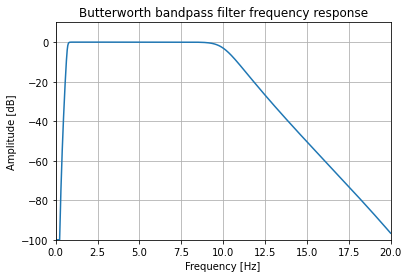

In [59]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.plot(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))

ax.set_title('Butterworth bandpass filter frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((0, 20, -100, 10))
ax.grid(which='both',
        axis='both')

<div class="alert alert-block alert-info"><p><b>Question:</b> What does this plot tell us about the filter characteristics? What types of noise does the filter attenuate?</p></div>

<div class="alert alert-block alert-warning"><p><b>Explanation:</b> This function generates the co-efficients for a Butterworth filter. The filter-type is specified as 'bp' - a bandpass filtter. The filter frequencies are specified in Hz (because the sampling frequency, fs, has also been specified): a high-pass frequency of 0.7 Hz, and a low-pass frequency of 10 Hz.</p></div>

<div class="alert alert-block alert-info"><p><b>Extension 1:</b> How could we re-design the filter to retain frequency content of up to 20 Hz, but eliminate mains frequencies?</p></div>

<div class="alert alert-block alert-info"><p><b>Extension 2:</b> What would be appropriate cut-off frequencies when using the PPG for different purposes, e.g. heart rate monitoring, or blood pressure estimation? See <a href="http://peterhcharlton.github.io/publication/wearable_ppg_chapter/">this book chapter</a> (Sections 2.2.4 to 2.2.5 on Sampling Frequency and Bandwidth) for details.</p></div>

---
## Filter the PPG signal

- Filter the PPG signal

In [60]:
ppg_filt = sp.sosfiltfilt(sos_ppg, ppg)

- Plot original and filtered PPG signals

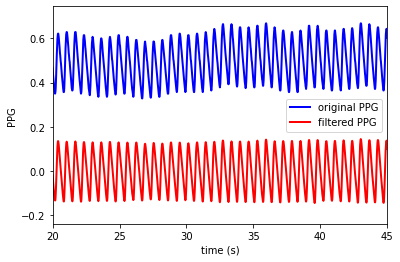

In [61]:
fig, ax = plt.subplots()
t = np.arange(0, len(ppg_filt))/segment_data.fs

ax.plot(t, ppg,
        linewidth=2.0,
        color = 'blue',
        label = "original PPG")

ax.plot(t, ppg_filt,
        linewidth=2.0,
        color = 'red',
        label = "filtered PPG")

ax.set(xlim=(0, n_seconds_to_load))
plt.xlabel('time (s)')
plt.ylabel('PPG')
plt.xlim([20, 45])

plt.legend()
plt.show()

<div class="alert alert-block alert-warning"><p><b>Note:</b> The PPG signals in MIMIC have already been filtered somewhat by the clinical monitors used to record them.</p></div>

<div class="alert alert-block alert-info"><p><b>Further work:</b> Several different types of filters have been used to filter the PPG signal (e.g. Chebyshev filter, Butterworth filter). Have a look at <a href="https://doi.org/10.1038/sdata.2018.76">this article</a> for examples of several filter types (on pp.8-9). Which type of filter do the authors recommend? Can you re-design the filter above to use this type of filter?</p></div>

## Prepare a segment of clean PPG signal for differentiation

We'll now extract a segment of clean PPG signal, which we'll use to show the process of differentiation.

_These first few steps are repeated from earlier in this tutorial._

### Extract data

- Specify the segment

In [62]:
rel_segment_n = 8 
rel_segment_name = segment_names[rel_segment_n]
rel_segment_dir = segment_dirs[rel_segment_n]

- Load the data for this segment

In [63]:
# Specify the segment of data to be loaded
start_seconds = 100 # time since the start of the segment at which to begin extracting data
n_seconds_to_load = 5

# Load metadata for this record
segment_metadata = wfdb.rdheader(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
fs = round(segment_metadata.fs)
print(f"Metadata loaded from segment: {rel_segment_name}")

# Load data from this record
sampfrom = fs*start_seconds
sampto = fs*(start_seconds + n_seconds_to_load)
segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir)
print(f"{n_seconds_to_load} seconds of data extracted from: {rel_segment_name}")

# Extract the PPG signal
sig_no = segment_data.sig_name.index('Pleth')
ppg = segment_data.p_signal[:,sig_no]
fs = segment_data.fs
print(f"Extracted the PPG signal from column {sig_no} of the matrix of waveform data.")

Metadata loaded from segment: 88995377_0001
5 seconds of data extracted from: 88995377_0001
Extracted the PPG signal from column 4 of the matrix of waveform data.


### Filter this signal segment

- Filter the PPG signal

In [64]:
ppg_filt = sp.sosfiltfilt(sos_ppg, ppg)

### Plot the signal

Plot the original and the filtered PPG signal

- Import the packages required to plot the signal: [matplotlib](https://matplotlib.org/stable/index.html) which is used to create plots, and [NumPy](https://numpy.org/) which is used to create a time vector in this example.

In [65]:
from matplotlib import pyplot as plt
import numpy as np

- Make the plot

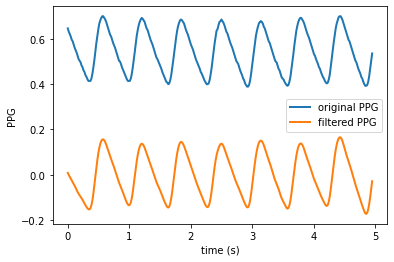

In [66]:
fig, ax = plt.subplots()
t = np.arange(0, len(ppg_filt)) / segment_data.fs

ax.plot(t, ppg,
        linewidth=2.0,
        label = "original PPG")

ax.plot(t, ppg_filt,
        linewidth=2.0,
        label = "filtered PPG")

plt.xlabel('time (s)')
plt.ylabel('PPG')

plt.legend()
plt.show()

- We will use the filtered signal instead of the original PPG from now on.

## Differentiate the PPG signal

### Differentiate using Savitzky-Golay filtering

- Differentiate it once and twice using the [Savitzky-Golay filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) function in SciPy

In [67]:
# Calculate first derivative
d1ppg = sp.savgol_filter(ppg_filt, 9, 5, deriv=1)

# Calculate second derivative
d2ppg = sp.savgol_filter(d1ppg, 9, 5, deriv=1) 

<div class="alert alert-block alert-warning"><p><b>Resource:</b> Savitzky-Golay filtering, which is used here to calculate derivatives, is described in <a href="https://doi.org/10.1021/ac60214a047">this article</a>.</p></div>

<div class="alert alert-block alert-info"><p><b>Question:</b> Can you summarise how Savitzky-Golay filtering works? What are its advantages in physiological signal processing?</p></div>

### Plot the PPG and its derivatives

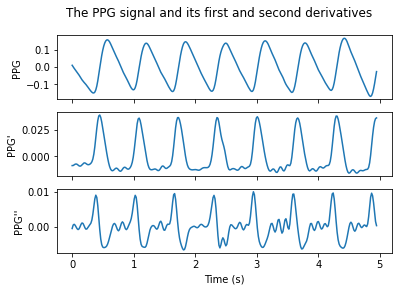

In [68]:
t = np.arange(0, len(ppg_filt))/segment_data.fs

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex = True, sharey = False)
ax1.plot(t, ppg_filt)
ax1.set(xlabel = '', ylabel = 'PPG')

plt.suptitle('The PPG signal and its first and second derivatives')

ax2.plot(t, d1ppg)
ax2.set(xlabel = '',
        ylabel = 'PPG\'')

ax3.plot(t, d2ppg)
ax3.set(xlabel = 'Time (s)',
        ylabel = 'PPG\'\'')

plt.show()

<div class="alert alert-block alert-info"><p><b>Question:</b> How would the derivatives have looked different if the PPG signal hadn't been filtered before differentiation? <br> <b>Hint:</b> In the differentiation step above, try replacing 'ppg_filt' with 'ppg'.</p></div>

<div class="alert alert-block alert-info"><p><b>Question:</b> How would the derivatives have been different if the PPG signal had been filtered using different co-efficients?
    <br> <b>Hint:</b> Above, try replacing the relatively wide band-pass frequencies '[0.7, 10]' with '[0.8, 3]'. 
    <br> <b>Consider:</b> Which band-pass frequencies would be most suitable for pulse wave analysis? How about heart rate estimation?</p>
</div>

### Comparison with a typical PPG pulse wave 

The figure below shows a typical PPG pulse wave recorded from a young, healthy subject.

![pic](https://upload.wikimedia.org/wikipedia/commons/b/b0/Photoplethysmogram_%28PPG%29_pulse_wave_fiducial_points.svg)

_Source: Charlton PH, [Photoplethysmogram (PPG) pulse wave fiducial points](https://commons.wikimedia.org/wiki/File:Photoplethysmogram_\(PPG\)_pulse_wave_fiducial_points.svg), Wikimedia Commons (CC BY 4.0)._

<div class="alert alert-block alert-info"><p><b>Question:</b> How does this pulse wave shape and derivatives compare to the shape of those obtained from MIMIC data above? What might explain the differences?</p></div>

<div class="alert alert-block alert-info"><p><b>Extension:</b> Try using 'rel_segment_n=3' above (i.e. analysing segment '82439920_0004'). How do the pulse waves in this signal compare? What might that tell us about this patient?</p></div>

<div class="alert alert-block alert-warning"><p><b>Further reading:</b> <a href="https://doi.org/10.1161/01.HYP.32.2.365">this article</a> provides further information on how age affects the shape of the PPG's second derivative.</p></div>